In [38]:
import numpy as np
from math import asin
from math import atan2
from math import cos
from math import sin

eps = np.finfo(float).eps
def Rot2Euler(R):
    sx =-R[1,2]
    if abs((abs(sx) - 1.0)) < eps:
        if abs(sx - 1.0):
            thetaX = eps + 0.5
            thetaZ = 0
            tehtaY = asin(-R[2,0])
        else:
            thetaX = -eps * 0.5
            thetaZ = 0.0
            tehtaY = asin(-R[2,0])
    else:
        thetaX = asin(-R[1,2])
        thetaZ = atan2(R[1,0], R[1,1])
        thetaY = atan2(R[0,2], R[2,2])
    return thetaX,thetaY, thetaZ

def RotY(deg):
    return np.array([[cos(deg),  0, sin(deg)],
                     [    0   ,  1,   0    ],
                     [-sin(deg), 0, cos(deg)]])
def RotZ(deg):
    return np.array([[cos(deg), -sin(deg),  0],
                     [sin(deg), cos(deg) ,  0],
                     [0       , 0        ,  1]])
def RotX(deg):
    return np.array([[1,    0    ,     0    ],
                     [0, cos(deg), -sin(deg)],
                     [0, sin(deg),  cos(deg)]])
        
def Euler2Rot(x_pitch,y_yaw,z_roll):
    R = RotY(y_yaw).dot(RotX(x_pitch).dot(RotZ(z_roll)))
    return R

#R_eyes = Euler2Rot(-0.0698131695,0.122173056,0)
#print "R_eyes"
#print R_eyes
#R_head = Euler2Rot(0.455842972,-0.0173952915,-0.0103132427)
#print "R_head"
#print R_head
#R_eyes_head = R_eyes.dot(R_head) 
#print "R result"
#print R_eyes_head
#print "thetaX,thetaY, thetaZ", Rot2Euler(R_eyes_head)



R_eyes = Euler2Rot(x_pitch = 0.7, y_yaw = 0.4,z_roll = 0)
R_head = Euler2Rot(x_pitch = 0.0, y_yaw = 0.4,z_roll = 0.0)
#R_eyes_head = R_eyes.dot(R_head) 
R_eyes_head = R_head.dot(R_eyes) 
print R_eyes_head

print "thetaX,thetaY, thetaZ", Rot2Euler(R_eyes_head)


[[ 0.69670671  0.46213348  0.5486642 ]
 [ 0.          0.76484219 -0.64421769]
 [-0.71735609  0.44883078  0.53287068]]
thetaX,thetaY, thetaZ (0.7, 0.8, 0.0)


<IPython.core.display.Javascript object>


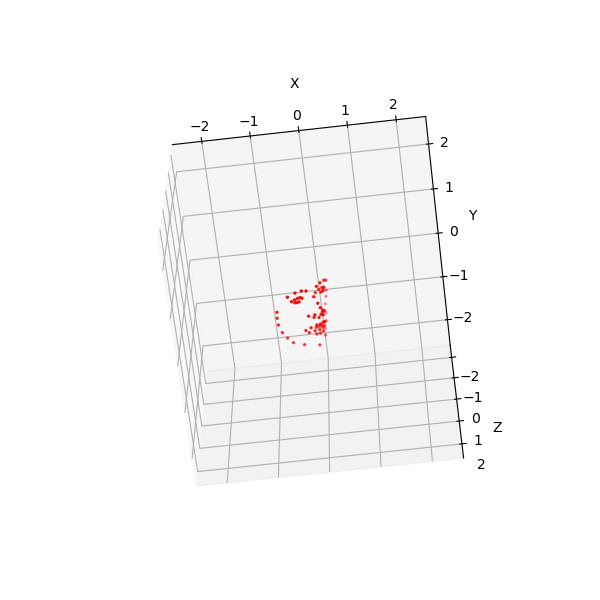

Y must increase downwards, X must increase to the right, and Z must increase in front


In [21]:
import numpy as np
import math
from math import sin, cos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import cv2
%matplotlib notebook

s = """static const PCA_POINT Frontal_MIDDLE_PCA_POINT[] = {
         {2791, {-37.3342526528987970f,  19.3098761097109350f, -10.4752325848268340f}, Frontal_MIDDLE_evectors + 0},
         {3273, {-24.4794828978287850f,  20.2775648954617860f,  -5.8791049052353825f}, Frontal_MIDDLE_evectors + 48},
         {3308, {-13.4600909955903420f,  16.3121268581479870f,  -5.2476315165555896f}, Frontal_MIDDLE_evectors + 96},
         {5264, {-50.0558352227918420f,  12.5271765039087470f, -19.8763965278613310f}, Frontal_MIDDLE_evectors + 144},
         {962, { 38.3324525053435110f,  19.3435940895305090f, -10.7407217678907130f}, Frontal_MIDDLE_evectors + 192},
         {4746, { 50.4076801205811550f,  12.4513948426682290f, -19.8861466660668780f}, Frontal_MIDDLE_evectors + 240},
         {1491, { 24.1590320508100800f,  20.2853678739868640f,  -5.6764737013554658f}, Frontal_MIDDLE_evectors + 288},
         {1531, { 13.9241694211281040f,  16.3599172099044740f,  -5.1002248860752992f}, Frontal_MIDDLE_evectors + 336},
         {2801, {-37.8235211425150840f,   3.6689433161900942f, -13.8595418402314490f}, Frontal_MIDDLE_evectors + 384},
         {4479, {-37.5380532104213320f,  -3.0461826831433085f, -14.8963691896727500f}, Frontal_MIDDLE_evectors + 432},
         {4581, {-42.2210388985809930f,   0.0128545045058240f, -18.9869829531774880f}, Frontal_MIDDLE_evectors + 480},
         {5281, {-24.2380522717587680f,   4.0638920899999977f, -12.7299559775031130f}, Frontal_MIDDLE_evectors + 528},
         {520, {-18.0044616183515130f,  -0.5481063716188593f, -15.4090640264039250f}, Frontal_MIDDLE_evectors + 576},
         {5274, {-31.5372596467801640f,   4.9977426462502628f, -12.0029829984280280f}, Frontal_MIDDLE_evectors + 624},
         {2871, {-33.4802792610190070f,  -3.8850317617155854f, -13.4068988193720710f}, Frontal_MIDDLE_evectors + 672},
         {2872, {-28.3597599734058220f,  -3.7980899147265186f, -12.5572036772198730f}, Frontal_MIDDLE_evectors + 720},
         {4352, { 37.4706670502093360f,  -3.0873197070813845f, -14.7750734305528690f}, Frontal_MIDDLE_evectors + 768},
         {4755, { 24.0593777878587680f,   3.8592854832423935f, -12.7128536862792530f}, Frontal_MIDDLE_evectors + 816},
         {980, { 31.5133607360672130f,   5.0328320522136218f, -12.0579846423131210f}, Frontal_MIDDLE_evectors + 864},
         {325, { 42.0015122293680250f,  -0.0114936460065205f, -18.6696837547236820f}, Frontal_MIDDLE_evectors + 912},
         {1047, { 28.2895914629342680f,  -3.7726463488911359f, -12.4991896762823980f}, Frontal_MIDDLE_evectors + 960},
         {4409, { 16.4469807712440850f,  -0.9873075965807667f, -14.7802926745332530f}, Frontal_MIDDLE_evectors + 1008},
         {1050, { 33.3203824649582570f,  -3.8515818786542559f, -13.3289419975304280f}, Frontal_MIDDLE_evectors + 1056},
         {973, { 37.6934405580394340f,   3.5668204437422628f, -13.6967143746465720f}, Frontal_MIDDLE_evectors + 1104},
         {4879, {  0.1246392185593285f, -33.6920904187828190f,  22.7049575528243180f}, Frontal_MIDDLE_evectors + 1152},
         {1423, {  0.0609023796152987f, -27.4676526194097690f,  22.1416450522491460f}, Frontal_MIDDLE_evectors + 1200},
         {1852, {  0.0456294479171456f, -19.5666573516241050f,  16.7279572583527880f}, Frontal_MIDDLE_evectors + 1248},
         {4669, {  0.1592268397488683f, -11.6145080109054760f,  10.0695388461442420f}, Frontal_MIDDLE_evectors + 1296},
         {1431, {  0.0000000000000000f,   0.0000000000000000f,   0.0000000000000000f}, Frontal_MIDDLE_evectors + 1344},
         {4705, {  0.0610122262886125f, -43.6121730340553740f,   8.2011158414518022f}, Frontal_MIDDLE_evectors + 1392},
         {3652, {-12.2811503489955760f, -32.1288863079343660f,  12.1059367408522580f}, Frontal_MIDDLE_evectors + 1440},
         {1877, { 12.4318272919628840f, -32.2080556450690660f,  12.3480308410042030f}, Frontal_MIDDLE_evectors + 1488},
         {660, {-18.2889460598942150f, -36.1078611701421580f,  -0.9178397061819258f}, Frontal_MIDDLE_evectors + 1536},
         {4458, {  8.9250598921085889f, -41.3151186629659360f,   3.9358865856717871f}, Frontal_MIDDLE_evectors + 1584},
         {4597, { -8.7469595293311322f, -41.2518735785736580f,   3.8460748867009871f}, Frontal_MIDDLE_evectors + 1632},
         {309, { 18.6134801477990310f, -36.2358466400586180f,  -0.9868062215078208f}, Frontal_MIDDLE_evectors + 1680},
         {1120, { 24.6348271782113210f, -67.4212745953375930f,  -7.9680868546046320f}, Frontal_MIDDLE_evectors + 1728},
         {1155, {  8.3297666091020286f, -56.8468289675364890f,   8.6341725513753982f}, Frontal_MIDDLE_evectors + 1776},
         {2988, { -8.2289423458954101f, -77.8103630171331990f,   5.1057544644951243f}, Frontal_MIDDLE_evectors + 1824},
         {1453, {  0.0893852900326039f, -57.4364514555955670f,  10.0025878786374510f}, Frontal_MIDDLE_evectors + 1872},
         {2479, { 18.4769989998408380f, -61.0319430968977270f,   1.9854109214792524f}, Frontal_MIDDLE_evectors + 1920},
         {50, { 20.2538728074212810f, -72.8156400374656130f,  -3.7750025704487493f}, Frontal_MIDDLE_evectors + 1968},
         {2966, { -8.1278283286874817f, -56.8199742145104590f,   8.6080103398325321f}, Frontal_MIDDLE_evectors + 2016},
         {397, {-19.9296990446996140f, -72.8259067312952770f,  -3.6887416658623304f}, Frontal_MIDDLE_evectors + 2064},
         {5627, {-24.4135466082649160f, -67.4871893909839290f,  -7.9438651463163330f}, Frontal_MIDDLE_evectors + 2112},
         {4252, {-18.2178925342611110f, -61.1067743627980490f,   1.9077466406489432f}, Frontal_MIDDLE_evectors + 2160},
         {1182, {  8.9158710111369004f, -77.8158407805017020f,   4.9991862060868044f}, Frontal_MIDDLE_evectors + 2208},
         {1183, {  0.2351487646765861f, -78.8558268897249090f,   6.3849990426803300f}, Frontal_MIDDLE_evectors + 2256},
         {1443, {  0.1048071481066910f, -63.5635759306287370f,   6.2242219034545778f}, Frontal_MIDDLE_evectors + 2304},
         {4309, { -6.9606869432673646f, -63.6538513452271740f,   4.9586536732668023f}, Frontal_MIDDLE_evectors + 2352},
         {1158, {  0.1090101634932168f, -71.3576506689489920f,   5.6696647676352701f}, Frontal_MIDDLE_evectors + 2400},
         {2972, {-10.0565274591895460f, -70.7715812997616210f,   2.8067477785947705f}, Frontal_MIDDLE_evectors + 2448},
         {2539, {  7.2802695166978149f, -63.6598493367764820f,   4.8998559092180454f}, Frontal_MIDDLE_evectors + 2496},
         {1164, { 10.3476733708584930f, -70.7382589253223700f,   2.8076231912677803f}, Frontal_MIDDLE_evectors + 2544},
         {2632, {-64.7154885814981070f, -20.9211098738174500f, -41.5703791405910860f}, Frontal_MIDDLE_evectors + 2592},
         {3472, {-51.0546217688570610f, -81.9121157828764550f, -36.1320787684436130f}, Frontal_MIDDLE_evectors + 2640},
         {5468, {-64.1342268002929220f, -34.9670226886817020f, -44.2861326056392600f}, Frontal_MIDDLE_evectors + 2688},
         {3534, {-57.4017820805601320f, -68.9312535091625450f, -42.5283439871303910f}, Frontal_MIDDLE_evectors + 2736},
         {3542, {-61.6510621103668650f, -51.4930260654056300f, -46.6871464976462320f}, Frontal_MIDDLE_evectors + 2784},
         {3670, {-41.9506105759163290f, -94.3387792750050240f, -31.1279065422870320f}, Frontal_MIDDLE_evectors + 2832},
         {3815, {-27.6766130304002050f, -99.6365746172843100f, -14.4038975259356000f}, Frontal_MIDDLE_evectors + 2880},
         {1712, {  0.2020053296667762f, -107.3757505938070600f,  -0.8803400017974115f}, Frontal_MIDDLE_evectors + 2928},
         {2035, { 27.7918419155659850f, -99.5924639333685210f, -14.0383669990958850f}, Frontal_MIDDLE_evectors + 2976},
         {1894, { 42.1540282457970150f, -94.3823034709506600f, -31.0275847091825310f}, Frontal_MIDDLE_evectors + 3024},
         {4968, { 64.4130326748080790f, -34.9049134890828580f, -44.2215987560490480f}, Frontal_MIDDLE_evectors + 3072},
         {1762, { 57.5512155204926050f, -69.0115759497346200f, -42.4471064687297140f}, Frontal_MIDDLE_evectors + 3120},
         {795, { 64.9522070341439390f, -20.9023911910231170f, -41.5035350666180490f}, Frontal_MIDDLE_evectors + 3168},
         {1691, { 51.1244115577963070f, -82.0734226894065700f, -35.9366928803423780f}, Frontal_MIDDLE_evectors + 3216},
         {1766, { 61.8779235052766620f, -51.4871293154014540f, -46.6521637816157830f}, Frontal_MIDDLE_evectors + 3264},
};         /**< Set of 3D points defining the deformable 3D model.*/
"""

DO_NOT_CONSIDER_OX_OY = False
PIXEL_WIDTH_IS_PIXEL_HEIGHT = True

def load_points(s, apply_revert = True, apply_translation = True):
    # load the 3d values
    points_3d_s = s.split("\n")
    points_float = []
    for line in points_3d_s[1:-2]:
        string_values = line.split(", {")[1].split("}, ")[0].replace("f"," ").split(",")
        string_values = [float(x) for x in string_values]
        points_float.append(string_values)
    points_3d = np.array(points_float).T
    
    #scale is in milimeters, I should normalize it in decimeters
    points_3d /=100

    if apply_revert:
        points_3d[2,:] *=-1
        points_3d[1,:] *=-1
        if apply_translation == True:
            points_3d[2,:] +=500/ 100 #500 milimeters to 5 decimeters
    return points_3d

def RotY(deg):
    return np.array([[cos(deg),  0, sin(deg)],
                     [    0   ,  1,   0    ],
                     [-sin(deg), 0, cos(deg)]])
def RotZ(deg):
    return np.array([[cos(deg), -sin(deg),  0],
                     [sin(deg), cos(deg) ,  0],
                     [0       , 0        ,  1]])
def RotX(deg):
    return np.array([[1,    0    ,     0    ],
                     [0, cos(deg), -sin(deg)],
                     [0, sin(deg),  cos(deg)]])
    


def plotFacesModel(face_model, subplot_code):
    ax = fig.add_subplot(subplot_code,projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(-250 / 100.0,250 / 100.0)
    ax.set_ylim(-250/ 100.0,250/ 100.0)
    ax.set_zlim(-250 / 100.0,250/ 100.0)

    
    xs = face_model[0,:]
    ys = face_model[1,:]
    zs = face_model[2,:]
    ax.scatter(xs,ys,zs, s=2.0,  c='r')
    
face_model = load_points(s, apply_revert = False, apply_translation = False)
roll = 0.0
pitch = 0.0
yaw = 0.7
R = RotZ(roll).dot(RotX(pitch).dot(RotY(yaw)))
face_model = R.dot(face_model)

plt.rcParams['figure.figsize'] = [6, 6]
fig = plt.figure()
plotFacesModel(face_model, subplot_code = 111) 
plt.show()

print "Y must increase downwards, X must increase to the right, and Z must increase in front"